In [10]:
!nvidia-smi

Mon Sep 13 01:34:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   47C    P2    42W / 190W |   3910MiB /  5926MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pwd

In [1]:
import lib

lib.set_gpu(0)

INFO:root:Runing on GPU:0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
!pip install git+git://github.com/xunzheng/notears

  Cloning git://github.com/xunzheng/notears to /tmp/pip-req-build-bjrbuw_u
  Running command git clone -q git://github.com/xunzheng/notears /tmp/pip-req-build-bjrbuw_u
  Resolved git://github.com/xunzheng/notears to commit ba61337bd0e5410c04cc708be57affc191a8c424
     |████████████████████████████████| 3.2 MB 1.8 MB/s eta 0:00:01
  Created wheel for notears: filename=notears-3.0-py3-none-any.whl size=17506 sha256=15ff7e8294052fa2fd8125fb4201e60e89e87bc67bb5d50ac22fbbbe0f1d3f06
  Stored in directory: /tmp/pip-ephem-wheel-cache-v0rqg2ja/wheels/43/53/c2/b825b070468bf341ea0fe485d793bc254bc584d18bb9f83eec
Successfully built notears


In [17]:
import pandas as pd

In [59]:
df = pd.read_csv('./nhefs.csv')
print(df)
df = df.dropna()
df = df.to_numpy()
type(df)

       price71   price82     tax71     tax82  price71_82  tax71_82
0     2.183594  1.739990  1.102295  0.461975    0.443787  0.640381
1     2.346680  1.797363  1.364990  0.571899    0.549316  0.792969
2     1.569580  1.513428  0.551270  0.230988    0.056198  0.320251
3     1.506592  1.451904  0.524902  0.219971    0.054794  0.304993
4     2.346680  1.797363  1.364990  0.571899    0.549316  0.792969
...        ...       ...       ...       ...         ...       ...
1624  2.167969  1.940186  1.049805  0.549927    0.227875  0.500000
1625  2.167969  1.940186  1.049805  0.549927    0.227875  0.500000
1626  1.800781  1.647705  0.734985  0.461975    0.152985  0.272949
1627  2.167969  1.940186  1.049805  0.549927    0.227875  0.500000
1628  2.167969  1.940186  1.049805  0.549927    0.227875  0.500000

[1629 rows x 6 columns]


numpy.ndarray

In [25]:
!ls notears/notears

__init__.py	 linear.py	       nonlinear.py   utils.py
lbfgsb_scipy.py  locally_connected.py  trace_expm.py


In [49]:
from notears import linear
import matplotlib.pyplot as plt

In [46]:
result = linear.notears_linear(df, lambda1=0.01, loss_type='l2')

In [47]:
result

array([[0.        , 0.        , 0.70992807, 0.        , 0.        ,
        0.        ],
       [0.51301353, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36537538],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.69914822, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a15b20e10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a15b20e10> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


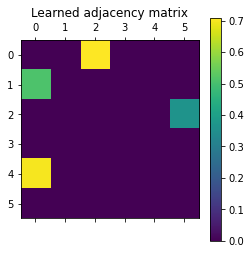

In [51]:
plt.matshow(result)
plt.title("Learned adjacency matrix")
plt.colorbar()

In [52]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

In [55]:
dot = make_dot(result)

# Save png
dot.format = 'png'
dag_path = dot.render('dag')

DEBUG:graphviz.files:write 145 bytes to 'dag'
DEBUG:graphviz.backend:run ['dot', '-Kdot', '-Tpng', '-O', 'dag']


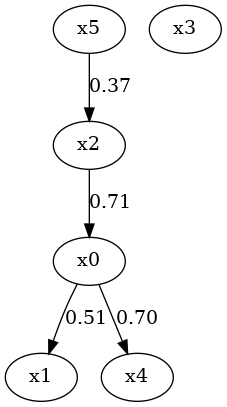

In [56]:
from IPython.display import Image
Image(filename=dag_path) 